In [1]:
from google.colab import files

In [4]:
!unzip /content/pothole.zip -d /content/dataset

Archive:  /content/pothole.zip
  inflating: /content/dataset/data.yaml  
  inflating: /content/dataset/sample_video.mp4  
  inflating: /content/dataset/train/images/pothole_1.jpg  
  inflating: /content/dataset/train/images/pothole_100.jpg  
  inflating: /content/dataset/train/images/pothole_1000.jpg  
  inflating: /content/dataset/train/images/pothole_1002.jpg  
  inflating: /content/dataset/train/images/pothole_1004.jpg  
  inflating: /content/dataset/train/images/pothole_1005.jpg  
  inflating: /content/dataset/train/images/pothole_1006.jpg  
  inflating: /content/dataset/train/images/pothole_1007.jpg  
  inflating: /content/dataset/train/images/pothole_1008.jpg  
  inflating: /content/dataset/train/images/pothole_1009.jpg  
  inflating: /content/dataset/train/images/pothole_1011.jpg  
  inflating: /content/dataset/train/images/pothole_1012.jpg  
  inflating: /content/dataset/train/images/pothole_1013.jpg  
  inflating: /content/dataset/train/images/pothole_1014.jpg  
  inflating: /

In [5]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.8 MB/s eta 0:00:00


In [8]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/dataset/data.yaml epochs=50 imgsz=640




Ultralytics 8.3.191 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=

In [10]:
from google.colab import files
files.download('/content/runs/detect/train2/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
!ls /content/runs/detect/train2/weights/


best.pt  last.pt


In [18]:
from ultralytics import YOLO

# Load the best model from training
model = YOLO("/content/runs/detect/train2/weights/best.pt")
# Example: test on a random image from validation set
results = model.predict(source="/content/dataset/valid/images", save=True, conf=0.25)



image 1/396 /content/dataset/valid/images/pothole_10.jpg: 448x640 11 potholes, 8.2ms
image 2/396 /content/dataset/valid/images/pothole_1001.jpg: 416x640 1 pothole, 6.2ms
image 3/396 /content/dataset/valid/images/pothole_1003.jpg: 640x640 1 pothole, 7.8ms
image 4/396 /content/dataset/valid/images/pothole_101.jpg: 448x640 1 pothole, 7.1ms
image 5/396 /content/dataset/valid/images/pothole_1010.jpg: 640x640 3 potholes, 7.8ms
image 6/396 /content/dataset/valid/images/pothole_1019.jpg: 384x640 1 pothole, 6.4ms
image 7/396 /content/dataset/valid/images/pothole_1025.jpg: 640x640 1 pothole, 7.7ms
image 8/396 /content/dataset/valid/images/pothole_1033.jpg: 448x640 1 pothole, 6.2ms
image 9/396 /content/dataset/valid/images/pothole_1037.jpg: 384x640 6 potholes, 7.2ms
image 10/396 /content/dataset/valid/images/pothole_1044.jpg: 544x640 1 pothole, 7.4ms
image 11/396 /content/dataset/valid/images/pothole_1047.jpg: 448x640 11 potholes, 6.2ms
image 12/396 /content/dataset/valid/images/pothole_1053.jpg

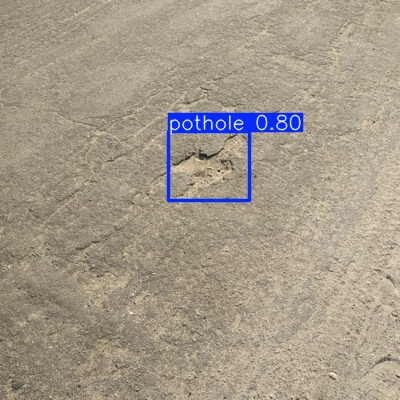

In [19]:
import glob
from IPython.display import Image

# Show one of the predicted images
pred_img = glob.glob('/content/runs/detect/predict/*.jpg')[0]
Image(filename=pred_img)


In [22]:
from ultralytics import YOLO

# Load the best model from training
model = YOLO("/content/runs/detect/train2/weights/best.pt")
# Example: test on a random image from validation set
results = model.predict(source="/content/dataset/MicrosoftTeams-image_32.jpg", save=True, conf=0.25)



image 1/1 /content/dataset/MicrosoftTeams-image_32.jpg: 448x640 1 pothole, 7.4ms
Speed: 2.7ms preprocess, 7.4ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict4


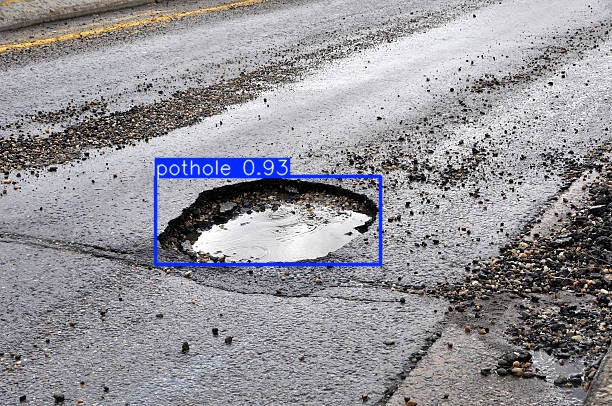

In [23]:
import glob
from IPython.display import Image

# Show one of the predicted images
pred_img = glob.glob('/content/runs/detect/predict4/*.jpg')[0]
Image(filename=pred_img)